In [2]:
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D

In [26]:
trainPath="D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 5\Group_11\\train"
TrCls=os.listdir(trainPath)
TrData=[]
TrLabel=[]
k=0
for i in TrCls:
    path=trainPath+"\\"+i
    img=os.listdir(path)
    label=np.zeros(5)
    label=k
    for j in img:
        # I=mpimg.imread(path+"\\"+j)
        I = cv.imread(path+"\\"+j)
        I=cv.resize(I,(224, 224))
        # if i=="car_side":
        #     I=cv.cvtColor(I,cv.COLOR_GRAY2BGR)
        #     I=I[:,:,::-1]
        TrData.append(I)
        TrLabel.append(label)
    k+=1

In [43]:
# print(TrData[249])#TrData)
# print(TrLabel[249])

In [27]:
testPath="D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 5\Group_11\\test"
TestCls=os.listdir(testPath)
TestData=[]
TestLabel=[]
k=0
for i in TestCls:
    path=testPath+"\\"+i
    img=os.listdir(path)
    label=np.zeros(5)
    label=k
    for j in img:
        I = cv.imread(path+"\\"+j)
        I=cv.resize(I,(224, 224))
        # if i=="car_side":
        #     I=cv.cvtColor(I,cv.COLOR_GRAY2BGR)
        #     I=I[:,:,::-1]
        TestData.append(I)
        TestLabel.append(label)
    k+=1

In [24]:
valPath="D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 5\Group_11\\val"
ValCls=os.listdir(valPath)
ValData=[]
ValLabel=[]
k=0
for i in ValCls:
    path=valPath+"\\"+i
    img=os.listdir(path)
    label=np.zeros(5)
    label=k
    for j in img:
        I = cv.imread(path+"\\"+j)
        I=cv.resize(I,(224, 224))
        # if i=="car_side":
        #     I=cv.cvtColor(I,cv.COLOR_GRAY2BGR)
        #     I=I[:,:,::-1]
        ValData.append(I)
        ValLabel.append(label)
    k+=1

In [35]:
TrData[120].shape

(224, 224, 3)

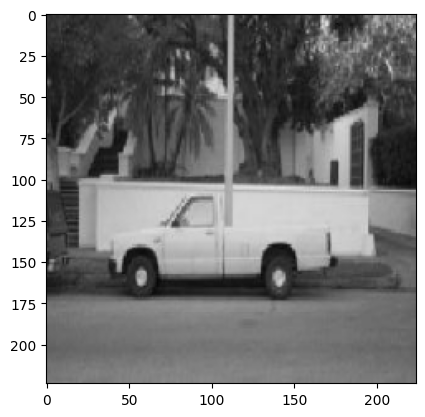

In [36]:
plt.imshow(TrData[120])

In [36]:
# tmp = np.array(TrData)
TrData = np.array(TrData)
ValData = np.array(ValData)
TestData = np.array(TestData)

TrLabel = np.array(TrLabel)
ValLabel = np.array(ValLabel)
TestLabel = np.array(TestLabel)

In [20]:
Test = tf.argmax(TestLabel, axis=1)

In [30]:
# input1=Input(shape=(224,224,3))
# h1=Conv2D(8,(11,11),4,activation='relu')(input1)#,input_shape=(224,224,3))
# h2=MaxPooling2D((3,3),2)(h1)
# h3=Conv2D(16,(5,5),1,activation='relu')(h2)
# h4=MaxPooling2D((3,3),2)(h3)
# h5=Flatten()(h4)
# h6=Dense(128,activation="relu")(h5)
# output1=Dense(5,activation="softmax")(h6)
# Model1=tf.keras.Model(inputs=input1,outputs=output1)

In [31]:
# Adam=tf.keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-08)
# my_callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1, )]
# Model1.compile(optimizer=Adam,loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [43]:
#history1 = Model1.fit(x=TrData,y=TrLabel,batch_size=1,epochs=100,validation_split=0,validation_data=(ValData,ValLabel),shuffle=True,validation_batch_size=None,verbose="auto")


In [33]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Resizing, Conv2D, MaxPooling2D, Rescaling
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import pickle

def make_convnet():
    image = Input((224,224,3))
    #preprocessing layers
    x = Rescaling(1/255)(image)

    #conv block 1
    x = Conv2D(filters=8, kernel_size=(11,11), strides=4, padding="valid", activation='relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding="valid")(x)

    #conv block 2
    x = Conv2D(filters=16, kernel_size=(5,5), strides=1, padding="valid", activation='relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding="valid")(x)
    
    # FCNN block
    x = Flatten()(x)
    x = Dense(128, activation="relu")(x)
    x = Dense(5, activation="softmax")(x)

    return Model(inputs=[image], outputs=[x], name="Architecture1")



# All of these are lists. Images are not of same shape, hence can't have np.array()
x_train, y_train = TrData, TrLabel
x_test, y_test = TestData, TestLabel
x_val, y_val = ValData, ValLabel

# y_train = relabel(y_train)
# y_test = relabel(y_test)
# y_val = relabel(y_val)

# idx = np.random.randint(0,10)
# plt.subplot(3,1,1)
# plt.imshow(x_train[idx][:,:,::-1])

# plt.subplot(3,1,2)
# plt.imshow(x_test[idx][:,:,::-1])

# plt.subplot(3,1,3)
# plt.imshow(x_val[idx][:,:,::-1])

# plt.show()

model = make_convnet()
model.summary()

adam_optimizer = Adam(learning_rate = 0.001)
model.compile(adam_optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                    min_delta=1e-4,
                                    patience=5,
                                    verbose=1)
history = model.fit(x=x_train, y=y_train,
                        batch_size=50, epochs=1000, # update on each class
                        callbacks=[earlystopping],
                        verbose=1, shuffle=True,
                        validation_split=0.0)

Model: "Architecture1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 54, 54, 8)         2912      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 26, 26, 8)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 22, 22, 16)        3216      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 10, 10, 16)       0         
 g2D)                                                

In [63]:
TrAcc=model.evaluate(TrData,TrLabel)
Pred1=model.predict(x=TrData)
Pred1 = tf.argmax(Pred1, axis=1)
TrConf1=tf.math.confusion_matrix(labels=TrLabel,predictions=Pred1)
TrConf1

8/8 [==============================] - 1s 143ms/step


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[50,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0],
       [ 0,  0, 50,  0,  0],
       [ 0,  0,  0, 50,  0],
       [ 0,  0,  0,  0, 50]])>

In [65]:
ValAcc=model.evaluate(ValData,ValLabel)
Pred2=model.predict(x=ValData)
Pred2 = tf.argmax(Pred2, axis=1)
ValConf2=tf.math.confusion_matrix(labels=ValLabel,predictions=Pred2)
ValConf2

2/2 [==============================] - 1s 88ms/step


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 6,  0,  0,  3,  1],
       [ 0, 10,  0,  0,  0],
       [ 0,  0,  8,  2,  0],
       [ 1,  0,  0,  9,  0],
       [ 0,  2,  0,  0,  8]])>

In [46]:
model.save("Model.h5")

In [44]:
def make_convnet1():
    image = Input((224,224,3))
    #preprocessing layers
    x = Rescaling(1/255)(image)

    #conv block 1
    x = Conv2D(filters=8, kernel_size=(11,11), strides=4, padding="valid", activation='relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding="valid")(x)

    #conv block 2
    x = Conv2D(filters=16, kernel_size=(5,5), strides=1, padding="valid", activation='relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding="valid")(x)
    
    x = Conv2D(32,(3,3),1,activation='relu')(x)
    x = MaxPooling2D((3,3),2)(x)
    # FCNN block
    x = Flatten()(x)
    x = Dense(128, activation="relu")(x)
    x = Dense(5, activation="softmax")(x)

    return Model(inputs=[image], outputs=[x], name="Architecture1")

In [47]:
model1 = make_convnet1()
model1.summary()

adam_optimizer = Adam(learning_rate = 0.001)
model1.compile(adam_optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                    min_delta=1e-4,
                                    patience=5,
                                    verbose=1)
history = model1.fit(x=x_train, y=y_train,
                        batch_size=50, epochs=1000, # update on each class
                        callbacks=[earlystopping],
                        verbose=1, shuffle=True,
                        validation_split=0.0)

Model: "Architecture1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 54, 54, 8)         2912      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 26, 26, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 22, 22, 16)        3216      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 10, 10, 16)       0         
 g2D)                                                

In [66]:
TrAcc=model1.evaluate(TrData,TrLabel)
Pred3=model1.predict(x=TrData)
Pred3 = tf.argmax(Pred3, axis=1)
TrConf3=tf.math.confusion_matrix(labels=TrLabel,predictions=Pred3)
TrConf3

8/8 [==============================] - 3s 211ms/step


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[50,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0],
       [ 0,  0, 50,  0,  0],
       [ 0,  0,  0, 50,  0],
       [ 0,  0,  0,  0, 50]])>

In [68]:
ValAcc=model1.evaluate(ValData,ValLabel)
Pred4=model1.predict(x=ValData)
Pred4 = tf.argmax(Pred4, axis=1)
ValConf4=tf.math.confusion_matrix(labels=ValLabel,predictions=Pred4)
ValConf4

2/2 [==============================] - 0s 96ms/step


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 6,  1,  0,  0,  3],
       [ 0,  8,  0,  0,  2],
       [ 0,  0, 10,  0,  0],
       [ 1,  1,  0,  8,  0],
       [ 0,  2,  0,  0,  8]])>

In [52]:
def make_convnet2():
    image = Input((224,224,3))
    #preprocessing layers
    x = Rescaling(1/255)(image)

    #conv block 1
    x = Conv2D(filters=8, kernel_size=(11,11), strides=4, padding="valid", activation='relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding="valid")(x)

    #conv block 2
    x = Conv2D(filters=16, kernel_size=(5,5), strides=1, padding="valid", activation='relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding="valid")(x)
    
    #conv block 3
    x = Conv2D(32,(3,3),1,activation='relu')(x)
    #x = MaxPooling2D((3,3),2)(x)

    x = Conv2D(64,(3,3),1,activation='relu')(x)
    x = MaxPooling2D((3,3),2)(x)
    # FCNN block
    x = Flatten()(x)
    x = Dense(128, activation="relu")(x)
    x = Dense(5, activation="softmax")(x)

    return Model(inputs=[image], outputs=[x], name="Architecture1")

In [54]:
model2 = make_convnet2()
model2.summary()

adam_optimizer = Adam(learning_rate = 0.001)
model2.compile(adam_optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='loss',
                                    min_delta=1e-4,
                                    patience=5,
                                    verbose=1)
history = model2.fit(x=x_train, y=y_train,
                        batch_size=50, epochs=1000, # update on each class
                        callbacks=[earlystopping],
                        verbose=1, shuffle=True,
                        validation_split=0.0)

Model: "Architecture1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 54, 54, 8)         2912      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 26, 26, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 22, 22, 16)        3216      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 10, 10, 16)       0         
 g2D)                                                

In [67]:
TrAcc=model2.evaluate(TrData,TrLabel)
Pred5=model2.predict(x=TrData)
Pred5 = tf.argmax(Pred5, axis=1)
TrConf5=tf.math.confusion_matrix(labels=TrLabel,predictions=Pred5)
TrConf5

8/8 [==============================] - 2s 201ms/step


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[44,  4,  1,  0,  1],
       [ 1, 34,  1,  1, 13],
       [ 0,  0, 50,  0,  0],
       [ 1,  4,  5, 33,  7],
       [ 0,  2,  4,  1, 43]])>

In [72]:
ValAcc=model2.evaluate(ValData,ValLabel)
Pred6=model2.predict(x=ValData)
Pred6= tf.argmax(Pred6, axis=1)
ValConf6=tf.math.confusion_matrix(labels=ValLabel,predictions=Pred6)
ValConf6

2/2 [==============================] - 0s 94ms/step


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 6,  2,  0,  1,  1],
       [ 1,  5,  0,  0,  4],
       [ 0,  0, 10,  0,  0],
       [ 0,  1,  1,  7,  1],
       [ 0,  2,  0,  0,  8]])>

In [74]:
TestAcc=model.evaluate(TestData,TestLabel)
Pred=model.predict(x=TestData)
Pred = tf.argmax(Pred, axis=1)
TestConf2=tf.math.confusion_matrix(labels=TestLabel,predictions=Pred)
TestConf2

4/4 [==============================] - 1s 114ms/step


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[12,  6,  0,  1,  1],
       [ 2, 17,  0,  0,  1],
       [ 2,  1, 17,  0,  0],
       [ 2,  1,  2, 12,  3],
       [ 0,  1,  0,  1, 18]])>

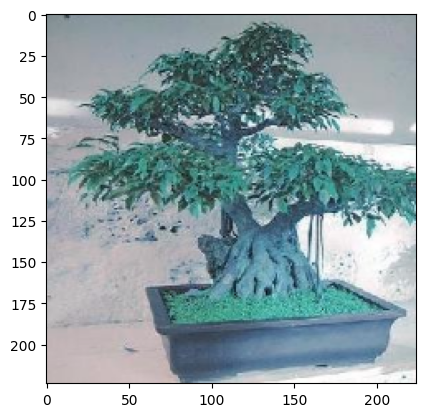

In [89]:
plt.imshow(TrData[5])

First Convolution Feature Map

In [78]:
get_2nd_layer_output = tf.keras.backend.function([model.layers[0].input],
                                  [model.layers[2].output])
layer_output = get_2nd_layer_output([TrData])[0]

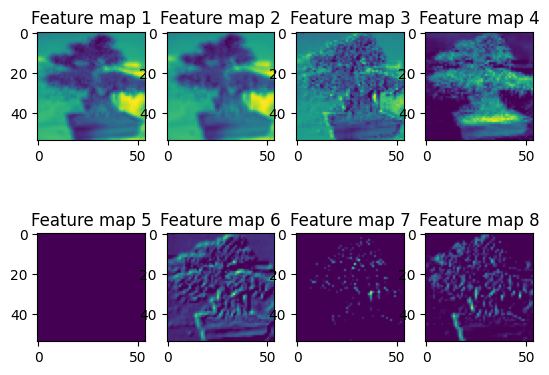

In [88]:
k=0
for i in range(8):
    plt.subplot(2,4,k+1)
    fm=f"Feature map {k+1}"
    plt.title(fm)
    plt.imshow(layer_output[5,:,:,k])
    k+=1

Second Convolution Feature Map

In [90]:
get_4th_layer_output = tf.keras.backend.function([model.layers[0].input],
                                  [model.layers[4].output])
layer_output2 = get_4th_layer_output([TrData])[0]

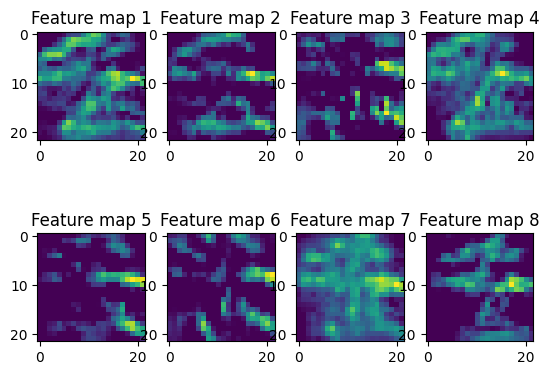

In [99]:
for i in range(8):
    plt.subplot(2,4,i+1)
    fm=f"Feature map {i+1}"
    plt.title(fm)
    plt.imshow(layer_output2[5,:,:,i])
    k+=1

In [130]:
weight=[]
for i in [2,4]:
    w,b=model.layers[i].get_weights()
    weight.append(w)

In [143]:
len(weight[0][0][1])
o=weight[0]
o[:,:,:,0]

array([[[-0.02259549,  0.07115037, -0.00016599],
        [ 0.05610725,  0.02323271,  0.04597802],
        [-0.02693928,  0.03157053,  0.0082359 ],
        [ 0.03859423,  0.05394107, -0.01487185],
        [ 0.06570002, -0.04318848,  0.00205259],
        [ 0.02943544,  0.06071592, -0.05004244],
        [ 0.02527605, -0.0242293 ,  0.02141378],
        [ 0.08503746,  0.05411606, -0.05504549],
        [ 0.00596461, -0.02699846,  0.07336519],
        [-0.03361322,  0.02642349, -0.02020759],
        [ 0.01363724, -0.00324339,  0.00287392]],

       [[-0.03719302, -0.03183927,  0.01662476],
        [-0.03877596,  0.05525544,  0.03986827],
        [ 0.06496206, -0.02265468, -0.04261212],
        [-0.02080971, -0.04044078,  0.07720219],
        [ 0.07957373,  0.05336646,  0.05651497],
        [ 0.00308641,  0.00474877,  0.05885221],
        [ 0.05571258,  0.00571327, -0.03657316],
        [ 0.08562534,  0.05187225,  0.01993911],
        [ 0.05127174,  0.07759333, -0.03705517],
        [-0.000504

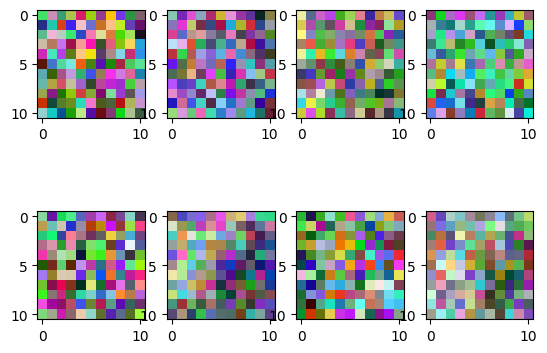

In [161]:
for l in range(8):
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = o[:,:,:,l].min(), o[:,:,:,l].max()
    filters = (o[:,:,:,l] - f_min) / (f_max - f_min)
    plt.subplot(2,4,l+1)
    plt.imshow(filters)#,cmap='gray')